**Desarrollado por:** Javier Fernando Botía Valderrama

*Docente del Departamento de Ingeniería de Sistemas*

**Materia:** Análisis Avanzado de Datos

**Departamento:** Ingeniería Aeroespacial

**Facultad de Ingeniería - Universidad de Antioquia**

# Utilidades de Python para Analítica de Datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Creando una función para separar los datos

In [ ]:
data = pd.DataFrame(np.random.normal(0.5,2, size = (500,4)))

In [ ]:
data.head()

,0,1,2,3
0,-0.505403,-0.072347,-2.370435,2.105673
1,-1.053978,1.110242,1.387644,0.891419
2,1.796923,-0.434500,3.497532,3.354538
3,-3.616865,2.045735,-0.348363,-3.437698
4,-1.588495,-0.247355,5.925344,0.770758


In [ ]:
def Separador(X, Porcentaje_Entrenamiento, Porcentaje_Prueba):
  # Los porcentajes tienen un rango entre 0 y 1
  Num_Filas = X.shape[0]
  X_desordenado = X.sample(n = int(Num_Filas), random_state=17) # Desorganizo. random_state -> "nivel" de desorganización
  indices_desordenados = X_desordenado.index
  Num_Separacion_1 = np.round(Porcentaje_Entrenamiento*Num_Filas,1)
  Num_Separacion_2 = np.round(Porcentaje_Prueba*Num_Filas,1)
  X_desordenado = np.array(X_desordenado)
  Data_Separacion_1 = pd.DataFrame(X_desordenado[:int(Num_Separacion_1),:], 
                                   index = indices_desordenados[:int(Num_Separacion_1)])
  Data_Separacion_2 = pd.DataFrame(X_desordenado[int(Num_Separacion_1) : int(Num_Separacion_1) + int(Num_Separacion_2),:],
                                   index = indices_desordenados[int(Num_Separacion_1) : int(Num_Separacion_1) + int(Num_Separacion_2)])
  return [Data_Separacion_1, Data_Separacion_2]

También se puede hacer con train_test_split  
**¿Por qué desorganizar?**  
- Con machine learning es necesario validar modelos con diferentes desordenes de los datos

In [ ]:
X_train, X_test = Separador(data, Porcentaje_Entrenamiento = 0.7, Porcentaje_Prueba = 0.3)
display(X_train.shape)
display(X_test.shape)

(350, 4)

(150, 4)

In [ ]:
display(X_train)

,0,1,2,3
190,-0.816101,-0.606282,3.320656,0.093721
267,-2.065096,1.994239,1.320929,3.638648
457,-1.432156,1.032147,1.458529,2.272503
263,1.514756,0.037202,-0.298542,-0.391373
159,2.584966,-4.738728,-1.257129,-0.542442
...,...,...,...,...
59,-0.087031,-0.623604,1.114645,-1.149597
55,1.303258,-0.754271,0.423964,0.104234
309,-2.191635,2.769564,-0.163579,2.409034
421,-2.413619,-1.129352,-0.987830,-0.233457


In [ ]:
display(X_test)

,0,1,2,3
120,1.596969,-1.589577,-2.688179,1.643974
193,-1.916542,0.508368,1.116343,0.644913
220,1.639492,-0.227466,-1.608060,1.661266
479,-2.757273,1.984293,-2.083305,2.118394
249,-1.819057,3.721673,0.372637,-0.804676
...,...,...,...,...
406,-0.220978,0.579769,2.019949,-0.587917
390,3.164502,1.938962,1.463956,0.175371
143,0.017479,2.790156,-1.809574,1.461993
241,1.188249,-2.356195,1.668853,0.571904


## Creando una gráfica de dispersión de datos

In [ ]:
data.values

array([[-0.5054031 , -0.07234711, -2.37043483,  2.10567347],
       [-1.05397775,  1.11024186,  1.38764409,  0.89141891],
       [ 1.7969229 , -0.43449967,  3.49753162,  3.35453807],
       ...,
       [ 0.91815443, -1.53356776, -0.54980248, -0.65125902],
       [ 2.29303613,  0.2423304 ,  2.57815475, -3.40738999],
       [ 0.67552854,  1.26486836,  3.97347439, -0.15063862]])

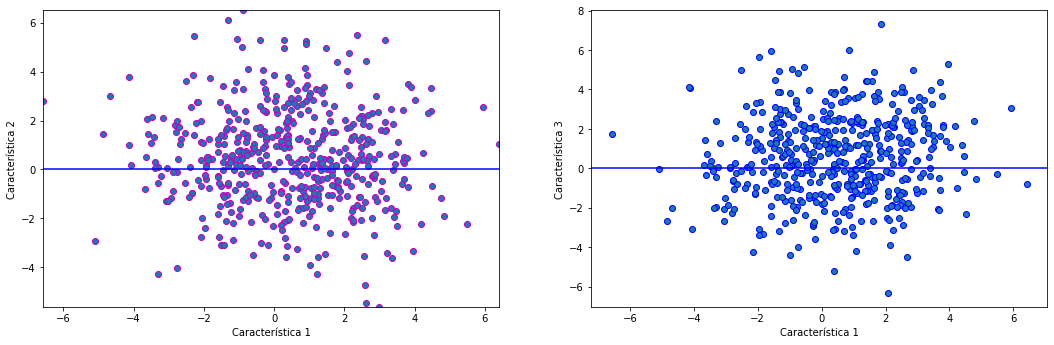

In [ ]:
fig = plt.figure(figsize=(18,12)) # Se define el tamaño de la figura en ancho y altura    

data = data.values

ax = fig.add_subplot(2, 2, 1)   
ax.scatter(data[:,0], data[:,1], edgecolors="m")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.xlim(np.min(data[:,0]),np.max(data[:,0])) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
plt.ylim(np.min(data[:,1]),np.max(data[:,1])) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
plt.xlabel('Característica 1') # Etiqueta del eje x
plt.ylabel('Característica 2') # Etiqueta del eje y

ax = fig.add_subplot(2, 2, 2) 
ax.scatter(data[:,0], data[:,2], edgecolors="b")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.xlabel('Característica 1') # Etiqueta del eje x
plt.ylabel('Característica 3') # Etiqueta del eje y
plt.show()

## Creando una gráfica de dispersión con vector de clases

In [ ]:
data = np.random.normal(0.5,2, size = (500,4))
Clases = np.random.randint(3, size = 500)
x = data[:,0:2]

In [ ]:
def scatterPlot(xDF, yDF, Num_Clases):
  Nombres = pd.DataFrame(xDF,columns = ["V1","V2"]).columns
  reduccion = pd.DataFrame(np.array(xDF), columns = Nombres)
  etiquetas = pd.DataFrame(np.array(yDF), columns = ["Clase"])
  concatenar = pd.concat((reduccion, etiquetas), axis = 1, join = "inner")
  sns.lmplot(x = "V1", y = "V2", hue = "Clase", data = concatenar, fit_reg = False, height=6, aspect=1)
  ax = plt.gca()
  ax.set_title("Gráfica de dispersión de datos con un número de clases igual a "+Num_Clases)

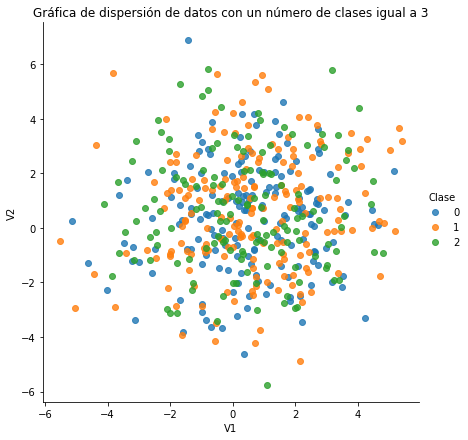

In [ ]:
scatterPlot(x, Clases, "3")